In [148]:
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import StandardScaler

In [149]:
# Define the column names for the UNSW-NB15 dataset
column_names = [
    'srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl',
    'sloss', 'dloss', 'service', 'sload', 'dload', 'spkts', 'dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb',
    'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'sjit', 'djit', 'stime', 'ltime', 'sinpkt',
    'dinpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd',
    'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm',
    'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat', 'label'
]

#Load the datasets without headers
df1 = pd.read_csv('Datasets/UNSW-NB15/UNSW-NB15_1.csv', header=None, names=column_names, low_memory=False)
df2 = pd.read_csv('Datasets/UNSW-NB15/UNSW-NB15_2.csv', header=None, names=column_names, low_memory=False)
df3 = pd.read_csv('Datasets/UNSW-NB15/UNSW-NB15_3.csv', header=None, names=column_names, low_memory=False)
df4 = pd.read_csv('Datasets/UNSW-NB15/UNSW-NB15_4.csv', header=None, names=column_names, low_memory=False)

#Combine into one dataframe
df = pd.concat([df1, df2, df3, df4], ignore_index=True)

print(df.shape)
print(df.head())

(2540047, 49)
        srcip  sport          dstip dsport proto state       dur  sbytes  \
0  59.166.0.0   1390  149.171.126.6     53   udp   CON  0.001055     132   
1  59.166.0.0  33661  149.171.126.9   1024   udp   CON  0.036133     528   
2  59.166.0.6   1464  149.171.126.7     53   udp   CON  0.001119     146   
3  59.166.0.5   3593  149.171.126.5     53   udp   CON  0.001209     132   
4  59.166.0.3  49664  149.171.126.0     53   udp   CON  0.001169     146   

   dbytes  sttl  ...  ct_ftp_cmd  ct_srv_src  ct_srv_dst ct_dst_ltm  \
0     164    31  ...           0           3           7          1   
1     304    31  ...           0           2           4          2   
2     178    31  ...           0          12           8          1   
3     164    31  ...           0           6           9          1   
4     178    31  ...           0           7           9          1   

   ct_src_ltm  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  attack_cat  \
0           3        

In [150]:
# Exploratory Data Analysis
print(df.info())

# Plotly visualization of the 'proto' column

proto_counts = df['proto'].value_counts()
fig = px.bar(x=proto_counts.index, y=proto_counts.values, title='Distribution of Protocols (Log Scale)', log_y = True)
fig.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540047 entries, 0 to 2540046
Data columns (total 49 columns):
 #   Column            Dtype  
---  ------            -----  
 0   srcip             object 
 1   sport             object 
 2   dstip             object 
 3   dsport            object 
 4   proto             object 
 5   state             object 
 6   dur               float64
 7   sbytes            int64  
 8   dbytes            int64  
 9   sttl              int64  
 10  dttl              int64  
 11  sloss             int64  
 12  dloss             int64  
 13  service           object 
 14  sload             float64
 15  dload             float64
 16  spkts             int64  
 17  dpkts             int64  
 18  swin              int64  
 19  dwin              int64  
 20  stcpb             int64  
 21  dtcpb             int64  
 22  smeansz           int64  
 23  dmeansz           int64  
 24  trans_depth       int64  
 25  res_bdy_len       int64  
 26  sjit          

In [151]:
# Plotly visualization of the 'attack_cat' column
proto_counts = df['attack_cat'].value_counts()
fig = px.bar(x=proto_counts.index, y=proto_counts.values, title='Distribution of Attack Categories', log_y = True)
fig.show()

In [152]:
label_counts = df['label'].value_counts()
print("Traffic Distributions")
print(label_counts)
print("\n0 = Normal, 1 = Attack")

# Plotly visualization of the the Traffic Distributions 
label_df = label_counts.reset_index()

Traffic Distributions
label
0    2218764
1     321283
Name: count, dtype: int64

0 = Normal, 1 = Attack


In [153]:
#Visualization of distribution of traffic
label_df = label_counts.reset_index()
label_df['label_name'] = label_df['label'].apply(lambda x: 'Attack' if x == 1 else 'Normal')
fig = px.pie(label_df,
             values='count',
             names='label_name',
             title='Distribution of Normal vs. Attack Traffic',
             color_discrete_map={'Normal':'lightcyan',
                                 'Attack':'darkorange'})
fig.show()

In [154]:
# --- One-Hot Encoding ---
print(f"Original shape: {df.shape}")

# Identify the categorical columns we want to encode
columns_to_encode = ['proto', 'service', 'state']
print(f"Columns to encode: {columns_to_encode}")

#Replace '-' is service column to none
print("Replacing '-' in service column with 'none'...")
df['service'] = df['service'].replace('-', 'none')

# Apply one-hot encoding using pandas
df = pd.get_dummies(df, columns=columns_to_encode)

# See the new shape and the new columns that were created
print(f"Shape after one-hot encoding: {df.shape}")
print("\nDataFrame columns after encoding:")
print(df.columns)

Original shape: (2540047, 49)
Columns to encode: ['proto', 'service', 'state']
Replacing '-' in service column with 'none'...
Shape after one-hot encoding: (2540047, 210)

DataFrame columns after encoding:
Index(['srcip', 'sport', 'dstip', 'dsport', 'dur', 'sbytes', 'dbytes', 'sttl',
       'dttl', 'sloss',
       ...
       'state_INT', 'state_MAS', 'state_PAR', 'state_REQ', 'state_RST',
       'state_TST', 'state_TXD', 'state_URH', 'state_URN', 'state_no'],
      dtype='object', length=210)
Shape after one-hot encoding: (2540047, 210)

DataFrame columns after encoding:
Index(['srcip', 'sport', 'dstip', 'dsport', 'dur', 'sbytes', 'dbytes', 'sttl',
       'dttl', 'sloss',
       ...
       'state_INT', 'state_MAS', 'state_PAR', 'state_REQ', 'state_RST',
       'state_TST', 'state_TXD', 'state_URH', 'state_URN', 'state_no'],
      dtype='object', length=210)


In [171]:
# --- Finalize Feature Set & Scale Date ---
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

#Define columns to drop
columns_to_drop = ['label', 'attack_cat', 'srcip', 'dstip'] # 'sport' 'dsport'
print("Creating the final feature set by dropping unnecessary columns...")

# Ensure we only try to drop columns that actually exist in the DataFrame
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]
X = df.drop(columns=existing_columns_to_drop)

#The 'service' column might have '-' values which are not numeric.
for col in X.columns:
   X[col] = pd.to_numeric(X[col], errors='coerce')

# Drop any rows that now have missing values after our conversion
X.dropna(inplace=True)
print(f"Shape of our final feature set: {X.shape}")

print("\nApplying Log Transformations to 'dur'")
X['dur'] = np.log1p(X['dur'])


#Scale using StandardScaler
print("\nScaling the feature set...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Wrap NumPy array in a dataframe
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print("\n--- First 5 rows of the final, scaled data ---")
print(X_scaled_df.head())

Creating the final feature set by dropping unnecessary columns...
Shape of our final feature set: (1087136, 207)

Applying Log Transformations to 'dur'

Scaling the feature set...
Shape of our final feature set: (1087136, 207)

Applying Log Transformations to 'dur'

Scaling the feature set...

--- First 5 rows of the final, scaled data ---
      sport    dsport       dur    sbytes    dbytes      sttl      dttl  \
0 -1.604981 -0.707144 -0.487709 -0.126638 -0.259453 -0.146243 -0.074151   
1  0.071780 -0.657536 -0.419966 -0.115831 -0.258664 -0.146243 -0.074151   
2 -1.601136 -0.707144 -0.487583 -0.126256 -0.259374 -0.146243 -0.074151   
3 -1.490516 -0.707144 -0.487407 -0.126638 -0.259453 -0.146243 -0.074151   
4  0.903276 -0.707144 -0.487485 -0.126256 -0.259374 -0.146243 -0.074151   

      sloss     dloss     sload  ...  state_MAS  state_PAR  state_REQ  \
0 -0.388201 -0.333141 -0.089798  ...  -0.000959        0.0  -0.057343   
1 -0.388201 -0.333141 -0.099660  ...  -0.000959        0.0  -

In [196]:
from sklearn.ensemble import IsolationForest

# --- Train Isolation Forest Model ---
iso_forest = IsolationForest(n_estimators=200,
                             contamination=0.04,
                             random_state=42,
                             n_jobs=-1)

print("\nTraining the Isolation Forest model... (This may take a while depending on your CPU)")

predictions = iso_forest.fit_predict(X_scaled)

print("Training complete")


#Add predictions back to original DataFrame fo analysis
df['anomaly_prediction'] = 1
df.loc[X.index, 'anomaly_prediction'] = predictions

print("\n--- Model Prediction Summary ---")
prediction_counts = df['anomaly_prediction'].value_counts()
print(prediction_counts)

print(f"\nThe model predicted {prediction_counts.get(-1, 0)} anomalies.")



Training the Isolation Forest model... (This may take a while depending on your CPU)
Training complete

--- Model Prediction Summary ---
anomaly_prediction
 1    2496561
-1      43486
Name: count, dtype: int64

The model predicted 43486 anomalies.


--- Classification Report ---
                  precision    recall  f1-score   support

Normal (Class 0)       0.99      0.97      0.98   1064921
Attack (Class 1)       0.37      0.73      0.50     22215

        accuracy                           0.97   1087136
       macro avg       0.68      0.85      0.74   1087136
    weighted avg       0.98      0.97      0.97   1087136


--- IF Mpdel: Confusion Matrix ---


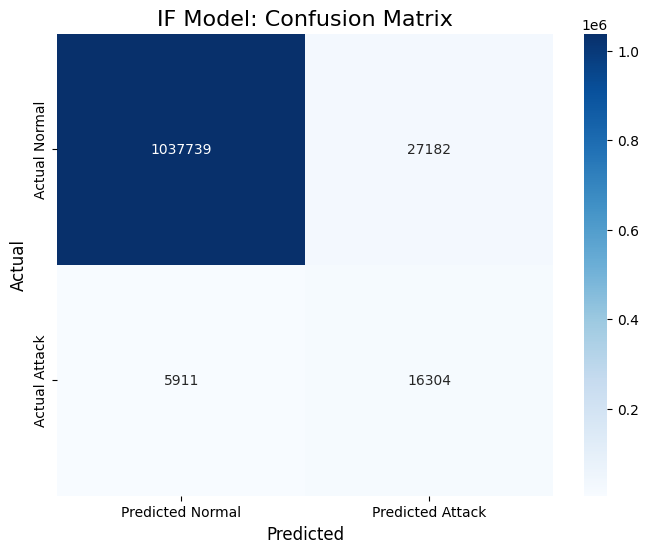


--- IF Confusion Matrix ---
Top-Left (True Negative): 1037739 -- Correctly identified normal traffic.
Bottom-Right (True Positive): 16304 -- Correctly identified attacks.
Top-Right (False Positive): 27182 -- Incorrectly flagged normal traffic as an attack.
Bottom-Left (False Negative): 5911 -- Missed 5911 attacks.


In [197]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


eval_df = df.loc[X.index].copy()

eval_df['predicted_label'] = np.where(eval_df['anomaly_prediction'] == -1, 1, 0)

true_labels = eval_df['label']
predicted_labels = eval_df['predicted_label']
target_names = ['Normal (Class 0)', 'Attack (Class 1)']

print("--- Classification Report ---")
report = classification_report(true_labels, predicted_labels, target_names=target_names, zero_division=0)
print(report)

print("\n--- IF Mpdel: Confusion Matrix ---")
if_cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(8,6))
sns.heatmap(if_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Normal', 'Predicted Attack'],
            yticklabels=['Actual Normal', 'Actual Attack'])
plt.title('IF Model: Confusion Matrix', fontsize=16)
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.show()

print("\n--- IF Confusion Matrix ---")
try:
    tn, fp, fn, tp = if_cm.ravel()
    print(f"Top-Left (True Negative): {tn} -- Correctly identified normal traffic.")
    print(f"Bottom-Right (True Positive): {tp} -- Correctly identified attacks.")
    print(f"Top-Right (False Positive): {fp} -- Incorrectly flagged normal traffic as an attack.")
    print(f"Bottom-Left (False Negative): {fn} -- Missed {fn} attacks.")
except ValueError:
    print("Could not unpack confusion matrix. Check if predictions contain both 0s and 1s.")

In [158]:
# --- Error Analysis of False Positives ---

#Isolate False Positives
false_positives_df = eval_df[(eval_df['label'] == 0) & (eval_df['predicted_label'] == 1)]

print(f"Found {len(false_positives_df)} False Positives to analyze.")
print("\n--- Statistical Summary of False Positives ---")
print(false_positives_df.describe())

true_negatives_df = eval_df[(eval_df['label'] == 0) & (eval_df['predicted_label'] == 0)]
print(f"Found {len(true_negatives_df)} True Negatives to analyze.")
print("\n--- Statistical Summary of True Negatives ---")
print(true_negatives_df.describe())



Found 29093 False Positives to analyze.

--- Statistical Summary of False Positives ---
                dur         sbytes        dbytes          sttl          dttl  \
count  29093.000000   29093.000000  2.909300e+04  29093.000000  29093.000000   
mean      11.566590   13428.072182  6.304414e+05     40.127075     27.260063   
std       14.299416   13881.515928  5.705311e+05     57.894959     42.694584   
min        0.000000      28.000000  0.000000e+00      0.000000      0.000000   
25%        0.848615     264.000000  9.200000e+01     31.000000      0.000000   
50%        5.113769   17538.000000  1.039052e+06     31.000000     29.000000   
75%       18.339182   19202.000000  1.087890e+06     31.000000     29.000000   
max       59.999989  285505.000000  1.641360e+06    255.000000    252.000000   

              sloss         dloss         sload         dload         spkts  \
count  29093.000000  29093.000000  2.909300e+04  2.909300e+04  29093.000000   
mean      10.560994    219.435466